In [119]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [120]:
overall_std_sl

239.93527567281123

In [121]:
# Load the CSV file into a DataFrame
df1 = pd.read_csv("rem_spikes/spline_interpolated_filtered_Paradeep.csv")
df1['Sl']=df1['Sl']-np.nanmean(df1['Sl'])
cleaned_sl = []

# Calculate the overall standard deviation once, outside the loop.
overall_std_sl = df1['Sl'].std()

# Loop over the DataFrame in 24-hour blocks to clean the data.
for i in range(0, len(df1), (24*45)):
    # Get the 24-hour block of data.
    block = df1.iloc[i:i+ (24*45)]

    # Calculate the mean of the block.
    block_mean = block['Sl'].mean()

    # Calculate the upper and lower thresholds based on the block mean and overall standard deviation.
    lower_threshold = block_mean - (1.5 * overall_std_sl)
    upper_threshold = block_mean + (1.5 * overall_std_sl)

    # Apply the cleaning conditions to the block.
    block_cleaned = block['Sl'].where(
        (block['Sl'] >= lower_threshold) & (block['Sl'] <= upper_threshold),
        np.nan
    )

    # Add the cleaned block to the list.
    cleaned_sl.extend(block_cleaned)

# Replace the original 'Sl' column with the cleaned data.
df1['Sl'] = cleaned_sl


In [ ]:
max_fill_limit = 3 * 24

# Apply spline interpolation with a limit.
df1['Sl'] = df1['Sl'].interpolate(method='linear', limit=max_fill_limit, limit_direction='forward')
# df1['Sl'] = np.where((df1['Sl'] < -1500) | (df1['Sl'] > 1500), np.nan, df1['Sl'])
# Plot the cleaned data.
plt.figure(figsize=(15, 7))
# plt.plot(df['Time'] ,sl, label='Ruksana')
# plt.plot(df1['Time'], adt_float, label='Anup')
plt.plot(df1['Time'], df1['Sl'], label='Cleaned Sl')
plt.ylim(-2000,2000)
# Add labels and title.
plt.xlabel('Time')
plt.ylabel('Sea Level (mm)')
plt.title('Cleaned Sea Level Data')
plt.legend()
plt.show()


In [ ]:
df1.to_csv("Final/Paradeep_final.csv")

In [635]:
df.iloc[0:10, df.columns.get_loc('Sl')] = np.nan

In [636]:
df.iloc[2600:2700, df.columns.get_loc('Sl')] = np.nan

In [637]:
df.iloc[1420:1500, df.columns.get_loc('Sl')] = np.nan

In [638]:
df.iloc[2200:2300, df.columns.get_loc('Sl')] = np.nan

In [639]:
df.iloc[1000:1010, df.columns.get_loc('Sl')] = np.nan

In [640]:
df.iloc[110:200, df.columns.get_loc('Sl')] = np.nan

In [641]:
df.iloc[410:450, df.columns.get_loc('Sl')] = np.nan

In [642]:
df.iloc[590:750, df.columns.get_loc('Sl')] = np.nan

In [643]:
df.iloc[745:800, df.columns.get_loc('Sl')] = np.nan

In [644]:
df.iloc[990:1180, df.columns.get_loc('Sl')] = np.nan

In [645]:
df.iloc[2250:2380, df.columns.get_loc('Sl')] = np.nan

In [646]:
df.iloc[4280:4320, df.columns.get_loc('Sl')] = np.nan

In [647]:
df.iloc[6280:6320, df.columns.get_loc('Sl')] = np.nan

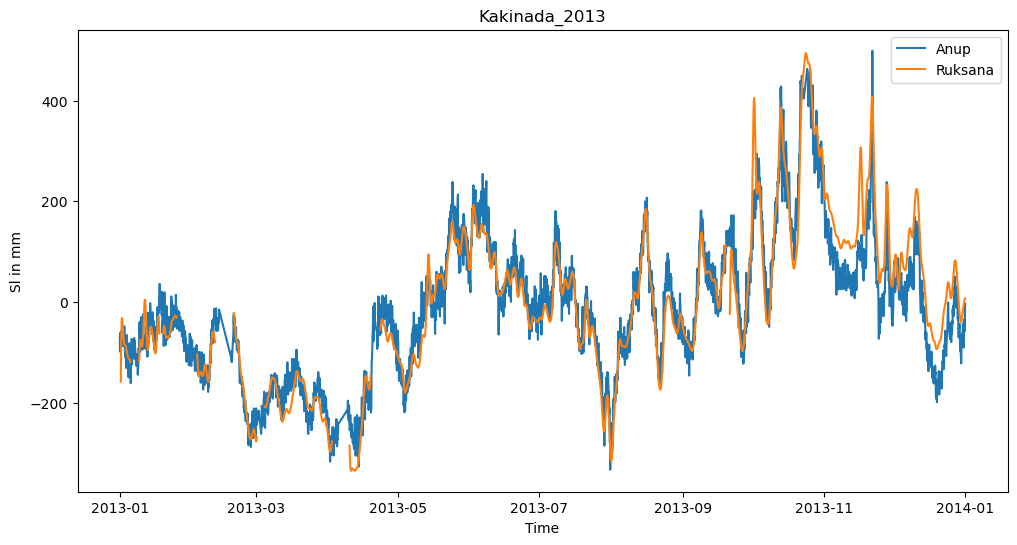

In [648]:

sl=df['Sl']-np.nanmean(df['Sl'])
# Plot TAX vs adt from NetCDF
plt.figure(figsize=(12, 6))
plt.plot(tax_datetime, adt_float, label='Anup')

# Plot Time vs Sl from DataFrame
plt.plot(pd.to_datetime(df['Time']), sl, label='Ruksana')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Sl in mm')
plt.title('Kakinada_2013')
plt.legend()

# Show the plot
plt.show()


In [567]:
ds

<xarray.Dataset>
Dimensions:  (TAX: 8760)
Coordinates:
  * TAX      (TAX) datetime64[ns] 2013-01-01 ... 2013-12-31T23:00:00
Data variables:
    RESI     (TAX) float64 -6.79 -8.93 -9.83 -9.83 ... -1.74 -0.99 -0.46 -0.34
Attributes:
    history:      FERRET V7.2 (optimized)  7-Aug-21
    Conventions:  CF-1.6